# Análise de risco de países

## 1. Introdução

Neste notebook, realizaremos uma análise de risco para investimentos nos principais mercados financeiros de países. A análise utiliza:

- **Dados históricos**: Período de 5 anos.
- **Retorno cambial**: Cálculo dos retornos diários.
- **Volatilidade cambial**: Volatilidade anualizada (indicador de risco cambial)
- **Variação acumulada**: Variação acumulada em 5 anos (indicador econômico)

### Metodologia
Os cálculos realizados incluem:
1. **Volatilidade cambial** = Retornos cambiais * raíz quadrada de 252.
2. **Variação acumulada** = (Retorno cambial final / Retorno cambial inicial - 1) * 100.
3. **Volatidade normalizada** = Volatilidades cambiais / Volatilidade cambial máxima.
4. **Variação normalizada** = Valor absoluto das variações acumuladas / Valor absoluto máximo das variações acumuladas.
5. **Score de risco** = (Volatilidade normalizada + Variação normalizada) / 2.

O notebook também permite ao usuário escolher:
- Os países para compor a análise (por padrão: Brasil, EUA, China, Zona do Euro, Japão, Reino Unido).
- O período de análise (por padrão: 5 anos).

### Objetivo
Este notebook ajuda investidores a visualizar riscos e retornos dos principais mercados financeiros de países.

## 2. Importação de bibliotecas

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## 3. Definição dos países

In [34]:
# Definição dos países e ativos relacionados (taxas de câmbio)
ativos_cambio = {
    "Brasil": "BRL=X",          # Real/Dólar
    "EUA": "DXY",              # Índice do Dólar
    "Zona do Euro": "EURUSD=X", # Euro/Dólar
    "Japão": "JPY=X",           # Iene/Dólar
    "Reino Unido": "GBPUSD=X",  # Libra/Dólar
    "China": "CNY=X",           # Yuan/Dólar
    "Índia": "INR=X",           # Rupia/Dólar
    "Rússia": "RUB=X",          # Rublo/Dólar
    "Canadá": "CAD=X",          # Dólar Canadense/Dólar
    "Austrália": "AUDUSD=X",    # Dólar Australiano/Dólar
    "Suíça": "CHFUSD=X",        # Franco Suíço/Dólar
    "África do Sul": "ZAR=X",   # Rand/Dólar
    "México": "MXN=X",          # Peso Mexicano/Dólar
    "Coreia do Sul": "KRW=X",   # Won/Dólar
}

## 4. Dados Históricos

In [35]:
# Dados históricos
fim = datetime.now()
inicio = fim - pd.DateOffset(years=5)  # Últimos 5 anos

dados_cambio = yf.download(list(ativos_cambio.values()), start=inicio.strftime('%Y-%m-%d'), end=fim.strftime('%Y-%m-%d'))["Adj Close"]
dados_cambio.columns = ativos_cambio.keys()

[*********************100%***********************]  14 of 14 completed


## 5. Cálculos

In [36]:
# Calcular retornos diários sem preenchimento automático
retornos_cambio = dados_cambio.pct_change(fill_method=None).dropna()

# Volatilidade anualizada (indicador de risco cambial)
volatilidade_cambial = retornos_cambio.std() * np.sqrt(252)

# Variação acumulada em 5 anos (indicador econômico)
variacao_acumulada = (dados_cambio.iloc[-1] / dados_cambio.iloc[0] - 1) * 100

## 6. Normalização

In [37]:
# Normalizar os valores para o intervalo [0, 1]
volatilidade_normalizada = volatilidade_cambial / volatilidade_cambial.max()
variacao_normalizada = variacao_acumulada.abs() / variacao_acumulada.abs().max()

# Combinar os indicadores em um score final (média simples)
score_risco = (volatilidade_normalizada + variacao_normalizada) / 2

## 7. Exibição dos gráficos

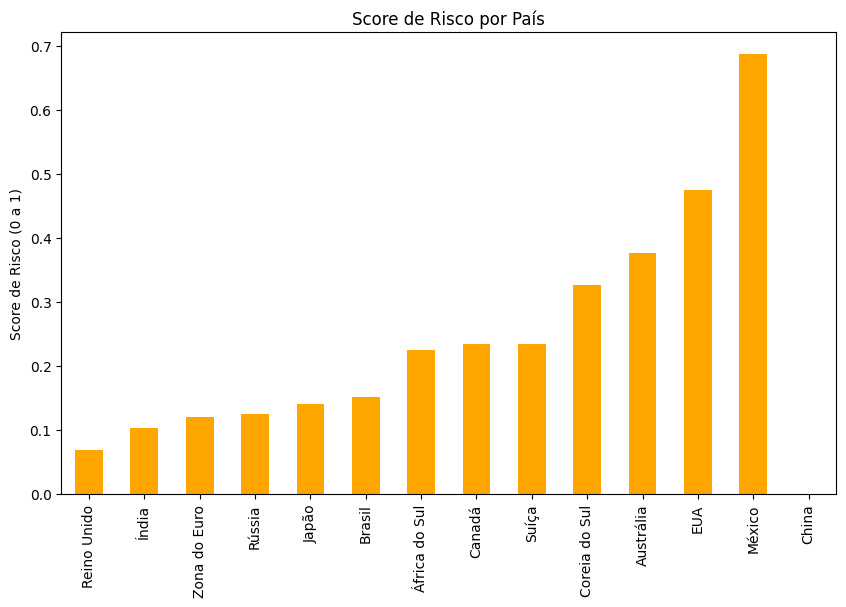

In [38]:
# Gráfico de score de risco
score_risco.sort_values().plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Score de Risco por País")
plt.ylabel("Score de Risco (0 a 1)")
plt.show()